In [121]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [122]:
food = [
    {
        'id': 1,
        'name': "Speisezwiebeln",
        'pice': 0.10,
        'shape': 'rund',
        'kcal': 40,
        'bio': False,
        'train': True,
        'zwiebel': True
    },
    {
        'id': 2,
        'name': "Lauchzwiebeln",
        'pice': 0.13,
        'shape': 'stange',
        'kcal': 32,
        'bio': False,
        'train': True,
        'zwiebel': True
    },
    {
        'id': 2,
        'name': "Bio-Lauchzwiebeln",
        'pice': 0.15,
        'shape': 'stange',
        'kcal': 32,
        'bio': True,
        'train': False,
        'zwiebel': True
    },
    {
        'id': 11,
        'name': "Rote Zwiebeln",
        'pice': 0.14,
        'shape': 'rund',
        'kcal': 32,
        'bio': False,
        'train': True,
        'zwiebel': True
    },
    {
        'id': 0,
        'name': "Bio Rote Zwiebeln",
        'pice': 0.15,
        'shape': 'rund',
        'kcal': 36,
        'bio': False,
        'train': True,
        'zwiebel': True
    },
    {
        'id': 3,
        'name': "Chiquita Banane",
        'pice': 0.2,
        'shape': 'stange',
        'kcal': 89,
        'bio': False,
        'train': False,
        'zwiebel': False
    },
    {
        'id': 4,
        'name': "Bio Banane",
        'pice': 0.2,
        'shape': 'stange',
        'kcal': 89,
        'bio': True,
        'train': True,
        'zwiebel': False
    },
    {
        'id': 5,
        'name': "Bio Kartoffeln",
        'pice': 0.17,
        'shape': 'rund',
        'kcal': 73,
        'bio': True,
        'train': True,
        'zwiebel': False
    },
    {
        'id': 6,
        'name': "Kohlrabi",
        'pice': 0.15,
        'shape': 'rund',
        'kcal': 27,
        'bio': False,
        'train': True,
        'zwiebel': False
    },
    {
        'id': 7,
        'name': "Süßkartoffel",
        'pice': 0.19,
        'shape': 'rund',
        'kcal': 86,
        'bio': False,
        'train': False,
        'zwiebel': False
    },
    {
        'id': 8,
        'name': "Karotten",
        'pice': 0.11,
        'shape': 'stange',
        'kcal': 41,
        'bio': False,
        'train': False,
        'zwiebel': False
    },
    {
        'id': 9,
        'name': "Zucchini Grün",
        'pice': 0.35,
        'shape': 'stange',
        'kcal': 17,
        'bio': False,
        'train': True,
        'zwiebel': False
    },
    {
        'id': 10,
        'name': "Tomate Rispe",
        'pice': 0.23,
        'shape': 'rund',
        'kcal': 21,
        'bio': False,
        'train': True,
        'zwiebel': False
    },
    {
        'id': 12,
        'name': "Bio Rispentomaten",
        'pice': 0.46,
        'shape': 'rund',
        'kcal': 21,
        'bio': True,
        'train': False,
        'zwiebel': False
    }
]

df = pd.DataFrame.from_dict(food)

In [123]:
feature_cols = ['pice', 'kcal', 'bio' ]

df_train = df[df['train'] == True]
df_test = df[df['train'] == False]

In [124]:
X = df_train.loc[:, feature_cols]
X

,pice,kcal,bio
0,0.10,40,False
1,0.13,32,False
3,0.14,32,False
4,0.15,36,False
6,0.20,89,True
7,0.17,73,True
8,0.15,27,False
11,0.35,17,False
12,0.23,21,False


In [125]:
y = df_train.loc[:, ['zwiebel']]
y

,zwiebel
0,True
1,True
3,True
4,True
6,False
7,False
8,False
11,False
12,False


In [126]:
#### Fit regression model
clf = DecisionTreeRegressor(max_depth=4)
clf.fit(X, y)

DecisionTreeRegressor(max_depth=4)

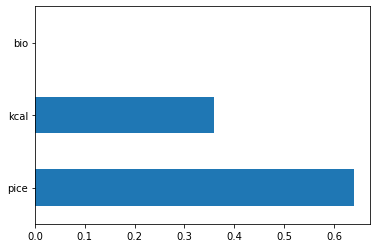

In [127]:
importances = clf.feature_importances_
f_import = list(zip(importances, feature_cols))

(pd.Series(clf.feature_importances_, index=X.columns)
   .nlargest(10)
   .plot(kind='barh'))        # some method chaining, because it's sexy!

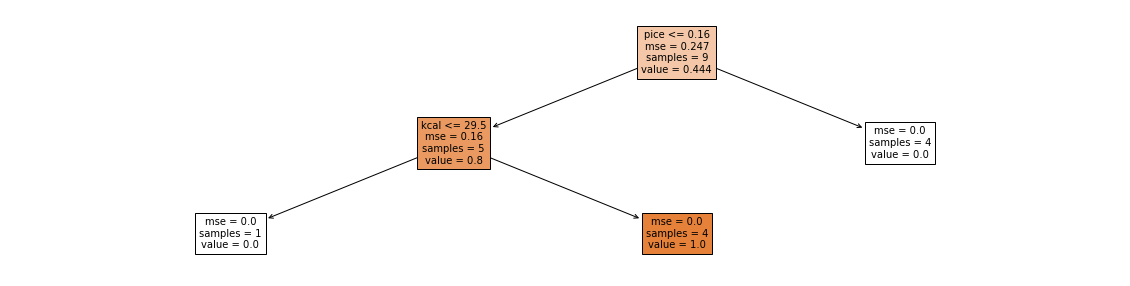

In [128]:
# plot tree
plt.figure(figsize=(20, 5))  # set plot size (denoted in inches)
tree.plot_tree(clf,
               fontsize=10,
               feature_names = feature_cols,
               filled = True);

plt.show()

In [129]:
X_test = df_test.loc[:, feature_cols]

y_predict = clf.predict(X_test)
df_2 = pd.DataFrame(data=y_predict)

In [130]:
df_test.reset_index().join(df_2)

,index,id,name,pice,shape,kcal,bio,train,zwiebel,0
0,2,2,Bio-Lauchzwiebeln,0.15,stange,32,True,False,True,1.0
1,5,3,Chiquita Banane,0.20,stange,89,False,False,False,0.0
2,9,7,Süßkartoffel,0.19,rund,86,False,False,False,0.0
3,10,8,Karotten,0.11,stange,41,False,False,False,1.0
4,13,12,Bio Rispentomaten,0.46,rund,21,True,False,False,0.0
